In [21]:
from glm_utils import *
import group_glm as gm
from sklearn.cross_validation import train_test_split
import pandas as pd
import pyprind
import multiprocessing
import pickle
import allensdk.brain_observatory.stimulus_info as stim_info
import itertools as it

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
#get the data

boc = BrainObservatoryCache(manifest_file = 'boc/manifest.json')
regions = ['VISpm']#, 'VISal'] #my favorite two higher order regions
lines = ['Cux2-CreERT2'] #let's focus on layer 2/3 pyramidal neurons for the time being

jobs = []
for reg, cre in it.product(regions, lines):
    data_set = download_data([reg], [cre], [stim_info.NATURAL_SCENES])


In [86]:

all_tensors = {}

for key in data_set.keys():
    dff, _, stim_table = get_data(data_set[key], stim_info.NATURAL_SCENES)
    data_tensor, trialCount = arrange_data_trialTensor(dff, stim_table)
    
    all_tensors[key] = data_tensor

(-1, 2)

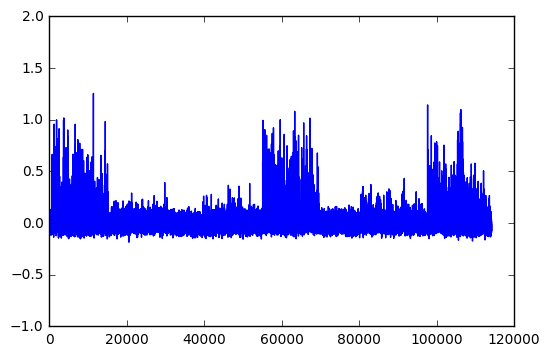

In [115]:
plt.plot(dff[116,:])
plt.ylim([-1, 2])

In [118]:
mean = [0]
std = [0]

for key in data_set.keys():
    
    #this computes the mean across the axis of numTrials.
    t_mean = np.mean(all_tensors[key], 2).flatten()
    t_std = np.std(all_tensors[key], 2).flatten()
    

    
    mean = np.concatenate((mean, t_mean))
    std = np.concatenate((std, t_std))


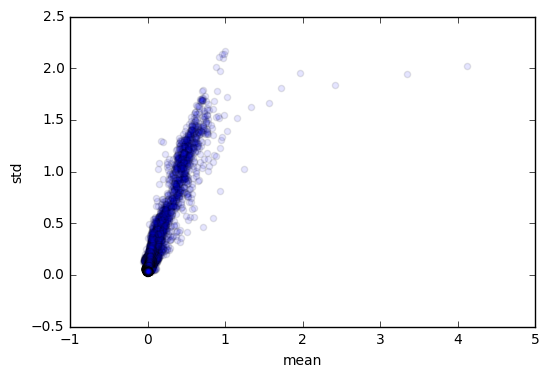

In [119]:
plt.scatter(t_mean, t_std, alpha = .1)
plt.xlabel('mean')
plt.ylabel('std')
#plt.xlim([-50, 50])
#plt.ylim([-5, 200])

In [38]:
min(t_mean)

-228.34123113408685

In [43]:
std

array([ 0.        ,  0.05171703,  0.05140267, ...,  0.05878406,
        0.05791092,  0.05919689])